In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv1D, Activation, MaxPooling1D, Dense, Dropout, Flatten
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers

In [91]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [92]:
#Extract Train and Test Data.
df_tr = pd.read_csv('Data\Intrusion-Detection\Train_data.csv',na_values='?',header=0)
df_ts = pd.read_csv('Data\Intrusion-Detection\Test_data.csv',na_values='?',header=0)

#Drop Duplicates
df_tr.drop_duplicates(keep='first')
df_ts.drop_duplicates(keep='first')

#Drop NA
df_tr.dropna()
df_ts.dropna()

#Drop ClassLabel column from input array X and Create output array y of Classlabel.
Xtr = np.array(df_tr.drop('xAttack',axis=1))
ytr = np.array(df_tr['xAttack'])
Xts = np.array(df_ts.drop('xAttack',axis=1))
yts = np.array(df_ts['xAttack'])

#Encode
le = preprocessing.LabelEncoder()
lb = preprocessing.LabelBinarizer()

Xtr[:,1] = le.fit_transform(Xtr[:,1])
Xts[:,2] = le.fit_transform(Xts[:,2])
Xts = np.delete(Xts,0,axis=1)

ytr = le.fit_transform(ytr)
lb.fit_transform(ytr)

yts = le.fit_transform(yts)
lb.fit_transform(yts)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [93]:
print(Xtr.shape)
print(ytr.shape)

print(Xts.shape)
print(yts.shape)

(125973, 41)
(125973,)
(10000, 41)
(10000,)


In [97]:
#Nomralize the data
Xtr_n = preprocessing.normalize(Xtr)
Xts_n = preprocessing.normalize(Xts)

In [117]:
ncomp =20
# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xtr_n)
Ztr = pca.transform(Xtr_n)
Zts = pca.transform(Xts_n)

In [118]:
K.clear_session()

In [ ]:
nout = int(np.max(ytr)+1) 
nin = Ztr.shape[1]

Ztr_new = Ztr.reshape((Ztr.shape[0], Ztr.shape[1], 1))
Zts_new = Zts.reshape((Zts.shape[0], Zts.shape[1], 1))

model = Sequential()
model.add(Conv1D(kernel_size=5, filters=64, input_shape=(Ztr.shape[1],1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=nout, activation='softmax', name='output'))

opt = optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

hist = model.fit(Ztr_new, ytr, batch_size=100, epochs=5,validation_data=(Zts_new,yts))

Train on 125973 samples, validate on 10000 samples
Epoch 1/5
125973/125973 [==============================] - 4s 33us/step - loss: 0.1141 - acc: 0.9696 - val_loss: 1.4818 - val_acc: 0.7733
Epoch 2/5
125973/125973 [==============================] - 4s 30us/step - loss: 0.0409 - acc: 0.9897 - val_loss: 1.3622 - val_acc: 0.7746
Epoch 3/5
 43000/125973 [=========>....................] - ETA: 2s - loss: 0.0332 - acc: 0.9913

In [111]:
score, accuracy = model.evaluate(Zts_new, yts, batch_size=100,verbose=0)
print(accuracy)

0.7535999971628189


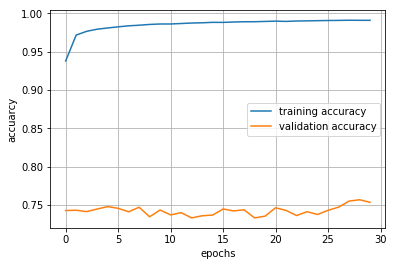

In [112]:
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

In [114]:
maxTr = np.argmax(tr_accuracy)
maxTs = np.argmax(val_accuracy)
print('Max Training Accuracy obtained:',tr_accuracy[maxTr])
print('Max Test Accuracy obtained:',val_accuracy[maxTs])

Max Training Accuracy obtained: 0.9907837472038967
Max Test Accuracy obtained: 0.7570000010728836
